# REINFORCEMENT LEARNING  
[Link](https://github.com/pytorch/examples/blob/master/reinforcement_learning/reinforce.py)

### Environment dynamics
- State - (Cart Position, Cart Velocity, Pole Angle, Pole Velocity)
- Action - Move Left or Move Right
- Reward function - +1 for every incremental timestep
- Termination - if the pole falls over too far or the cart moves more then 2.4 units away from center

Things we need to know clearly to understand below:

What is an environment? What is a state? What is an action? What is an episode? What is a policy?

[Explaining RL](https://flappybird.io/)

In [1]:
# OpenAI gym
import gym
env = gym.make('CartPole-v1')

[OpenAI gym](https://gym.openai.com/envs/#classic_control)

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class Policy(nn.Module):
    def __init__(self):
        super(Policy, self).__init__()
        self.affine1 = nn.Linear(4, 24)
        self.affine2 = nn.Linear(24, 36)
        self.dropout = nn.Dropout(p=0.6)
        self.affine3 = nn.Linear(36, 2)
        
        self.saved_log_probs = []
        self.rewards = []
    
    def forward(self, x):
        x = self.affine1(x)
        #x = self.dropout(x)
        x = self.affine2(x)
        x = self.dropout(x)
        x = F.relu(x)
        action_scores = self.affine3(x)
        return F.softmax(action_scores, dim=1)

policy = Policy()
optimizer = optim.Adam(policy.parameters(), lr=1e-2)
eps = np.finfo(np.float32).eps.item()

In [4]:
from torch.distributions import Categorical
def select_action(state):
    state = torch.from_numpy(state).float().unsqueeze(0)
    probs = policy(state) # FORWARD PASS
    m = Categorical(probs) # we are sampling from a distribution to add some exploration to the policy's behavior. 
    action = m.sample()
    policy.saved_log_probs.append(m.log_prob(action))
    return action.item()

In [5]:
gamma = 0.99 # discount factor
def finish_episode_and_update():
    R = 0
    policy_loss = []
    returns = []
    for r in policy.rewards[::-1]:
        R = r + gamma * R
        returns.insert(0, R)
    print("R", R)
    #print(returns)
    returns = torch.tensor(returns)
    returns = (returns - returns.mean()) / (returns.std() + eps)
    for log_prob, R in zip(policy.saved_log_probs, returns):
        policy_loss.append(-log_prob * R)
    optimizer.zero_grad()
    policy_loss = torch.cat(policy_loss).sum()
    policy_loss.backward() # backward pass
    optimizer.step()
    del policy.rewards[:]
    del policy.saved_log_probs[:]


In [6]:
def main():
    num_episodes = 1000
    reward_epd = []
    for _ in range(num_episodes):
        state = env.reset() # reset() resets the environment
        episode_reward = 0 
        for t in range(1, 10000): # no of steps 
            action = select_action(state)
            state, reward, done, _ = env.step(action)
            env.render() # show 
            policy.rewards.append(reward)
            episode_reward += reward
            if done:
                print("episode ended!")
                break
        reward_epd.append(episode_reward)

        finish_episode_and_update()
    return reward_epd

Some News article covering RL in games

[1](https://www.bbc.com/news/technology-40287270)

[2](https://www.theverge.com/2019/10/30/20939147/deepmind-google-alphastar-starcraft-2-research-grandmaster-level)

[3](https://bdtechtalks.com/2019/04/17/openai-five-neural-networks-dota-2/)

[4](https://www.vox.com/future-perfect/2019/9/20/20872672/ai-learn-play-hide-and-seek)

[5](https://www.wired.com/story/a-robot-teaches-itself-to-play-jenga/)


reward function failure modes(https://openai.com/blog/faulty-reward-functions/)


### [Good resource to read on policy optimization/deep RL](https://spinningup.openai.com/en/latest/spinningup/rl_intro3.html)

In [7]:
reward = main()

episode ended!
R 19.8369410460954
episode ended!
R 26.76966303456023
episode ended!
R 17.383137616441328
episode ended!
R 10.466174574128356
episode ended!
R 21.4321859192781
episode ended!
R 31.744540498961268
episode ended!
R 10.466174574128356
episode ended!
R 15.705680661607312
episode ended!
R 13.12541872310217
episode ended!
R 13.12541872310217
episode ended!
R 35.08973716315975
episode ended!
R 19.027213177874142
episode ended!
R 14.854222890512437
episode ended!
R 19.027213177874142
episode ended!
R 32.42709509397166
episode ended!
R 35.73883979152815
episode ended!
R 18.209306240276913
episode ended!
R 30.358678195042614
episode ended!
R 41.29632180625153
episode ended!
R 26.76966303456023
episode ended!
R 17.383137616441328
episode ended!
R 44.1733861452136
episode ended!
R 21.4321859192781
episode ended!
R 24.528071279636723
episode ended!
R 19.027213177874142
episode ended!
R 27.501966404214627
episode ended!
R 25.282790566840355
episode ended!
R 15.705680661607312
episode 

episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 99.31599934061613
episode ended!
R 97.54875451638065
episode ended!
R 96.10804459823714
episode ended!
R 95.94839520334584
episode ended!
R 95.8661312145147
episode ended!
R 89.3671816314788
episode ended!
R 86.05244312247741
episode ended!
R 78.72742967709804
episode ended!
R 81.1443154832622
episode ended!
R 75.75833539554192
episode ended!
R 79.97229731425098
episode ended!
R 77.63113260213518
episode ended!
R 76.47833707595892
episode ended!
R 76.47833707595892
episode ended!
R 76.71355370519933
episode ended!
R 26.76966303456023
episode ended!
R 69.4540974071695
episode ended!
R 73.46337502522941
episode ended!
R 70.06196086876682
episode ended!
R 70.06196086876682
episode ended!
R 65.5387816652482
episode ended!
R 26.76966303456023
episode ended!
R 68.8338918550857
episode ended!
R 65.538781

episode ended!
R 62.653571954573025
episode ended!
R 93.4364660506818
episode ended!
R 59.52680273216757
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 49.00142537504343
episode ended!
R 86.4666995092967
episode ended!
R 98.50200162663312
episode ended!
R 99.34295169575849
episode ended!
R 90.57523065443742
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 98.24066627351276
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 96.26140316996864
episode ended!
R 94.18218280232912
episode ended!
R 95.94839520334584
episode ended!
R 94.89474310107886
episode ended!
R 94.84317484957461
episode ended!
R 92.7

episode ended!
R 20.638571635634445
episode ended!
R 20.638571635634445
episode ended!
R 20.638571635634445
episode ended!
R 19.8369410460954
episode ended!
R 13.994164535871148
episode ended!
R 15.705680661607312
episode ended!
R 42.46452500230712
episode ended!
R 15.705680661607312
episode ended!
R 29.655230500043047
episode ended!
R 19.8369410460954
episode ended!
R 17.383137616441328
episode ended!
R 23.76572856528962
episode ended!
R 22.21786406008532
episode ended!
R 19.027213177874142
episode ended!
R 18.209306240276913
episode ended!
R 24.528071279636723
episode ended!
R 16.54862385499124
episode ended!
R 16.54862385499124
episode ended!
R 21.4321859192781
episode ended!
R 19.027213177874142
episode ended!
R 17.383137616441328
episode ended!
R 17.383137616441328
episode ended!
R 21.4321859192781
episode ended!
R 21.4321859192781
episode ended!
R 19.027213177874142
episode ended!
R 28.944677272770754
episode ended!
R 25.282790566840355
episode ended!
R 21.4321859192781
episode e

episode ended!
R 35.73883979152815
episode ended!
R 64.48391852949266
episode ended!
R 64.12517023181076
episode ended!
R 66.56231431100866
episode ended!
R 67.22772425621959
episode ended!
R 47.44035124744376
episode ended!
R 71.5292226726804
episode ended!
R 66.56231431100866
episode ended!
R 37.01763687967674
episode ended!
R 68.8338918550857
episode ended!
R 38.27098590577118
episode ended!
R 46.90944570448865
episode ended!
R 65.5387816652482
episode ended!
R 38.27098590577118
episode ended!
R 64.48391852949266
episode ended!
R 48.48628825761963
episode ended!
R 67.22772425621959
episode ended!
R 99.34295169575849
episode ended!
R 65.19068855075575
episode ended!
R 99.34295169575849
episode ended!
R 71.8139304459536
episode ended!
R 68.20109361808561
episode ended!
R 66.89669116789858
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 99.34295169575849
episode ended!
R 68.8338918550857
episode ended!
R 64.12517023181076
episode ended!
R 65.19068

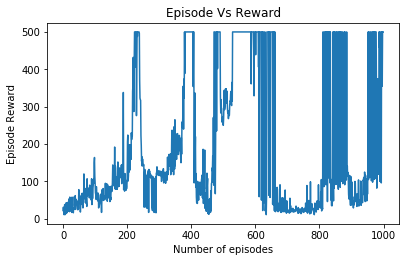

In [15]:
fig, ((ax1)) = plt.subplots();

ax1.plot(reward)
ax1.set_title('Episode Vs Reward')
ax1.set_xlabel('Number of episodes'); ax1.set_ylabel('Episode Reward')
fig.tight_layout(pad=2)
plt.show()
fig.savefig('results.png')